In [1]:
import json
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Preparing the symptoms dictionaries

In [2]:
# loading the symptoms dictionaries 

# symptom to symptom category mapping
with open("symptom_category_dict_2.json","r") as f:
    symptom_category_dict = f.read()
# symptom_synonym to symptom category mapping
with open("symptom_synonym_category_dict_2.json","r") as f:
    symptom_synonym_category_dict = f.read()
# the 355 lexicon symptoms
with open("lexicon_symptoms_dict_named.json","r") as f:
    lexicon_symptoms_dict = f.read()

# transforming the read data into Python dictionaries
lexicon_symptoms_dict = ast.literal_eval(lexicon_symptoms_dict)
symptom_synonym_category_dict = ast.literal_eval(symptom_synonym_category_dict)
symptom_category_dict = ast.literal_eval(symptom_category_dict)

In [3]:
# making a symptoms list ordered by the length of the symptom name 
lexicon_symptoms_list = list(lexicon_symptoms_dict.keys())
lexicon_symptoms_df = pd.DataFrame()
lexicon_symptoms_word_count = [len(symptom.split()) for symptom in lexicon_symptoms_list]
lexicon_symptoms_df['lexicon_symptoms'] = lexicon_symptoms_list
lexicon_symptoms_df['word_count'] = lexicon_symptoms_word_count
lexicon_symptoms_df.sort_values('word_count', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
lexicon_symptoms_ordered = lexicon_symptoms_df.lexicon_symptoms.to_list()

In [4]:
# longer symptoms are the first to check to avoid detecting the shorter ones first 
lexicon_symptoms_df

,lexicon_symptoms,word_count
9883,mental and behavioural disorders due to use of...,13
9881,mental and behavioral disorders due to use of ...,13
4166,(examination fear) or (flying phobia) or (stag...,13
9880,mental and behavioral disorders due to use of ...,13
9882,mental and behavioural disorders due to use of...,13
...,...,...
9985,amnesias,1
9989,difficulty;remembering,1
9995,dysmnesia,1
9996,forgetfulness,1


### Extracting the symptoms from the Reddit posts

In [5]:
# loading the reddit posts to analyze
df = pd.read_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_concatenated_clean.csv', index_col=0)

C:\Users\hayadi\AppData\Local\Temp\ipykernel_13568\1401673207.py:2: DtypeWarning: Columns (75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_concatenated_clean.csv', index_col=0)


In [6]:
len(df)

20377

In [7]:
#csw = ['covid','symptom','like','feel','month','anyone','day','long','back','week','time','start','since','still','think','else','help','know','issue','really','test','experience','better','make','would','work','try','last','cannot','year','could','much','normal','doctor','bad','first','worse','say','felt','post','want','ago','never','something','anything','lot','around','every','almost','away','find','right','life','haul','well','sick','feeling','tell','able','positive','need','hour','happen','good','use','give','longcovid','deal','notice','infection','today','sure','pretty','mild','sometimes','end','way','ever','everything','weird','keep','little','people','problem','new','later','hard','look','nothing','stop','wonder','past','etc','bit','point','though','may','many','fine','hauler','without','cause','maybe','march','severe','leave','hi','always','couple','next','improve','similar','completely','second','everyone','full','health','finally','hope','worst','develop','due','negative','morning','change','mostly','constant','another','struggle','home','recently','suffer','might','anymore','actually','january','put','old','however','level','enough','relate','advice','become','light','stay','already','case','show','different','december','whole','far','clear','diagnose','kind','effect','early','part','believe','daily','supplement','extreme','healthy','result','probably','energy','guy','minute','return','crazy','talk','sense','left','short','someone','catch','story','ask','especially','hit','thought','yet','improvement','sensation','random','super','begin','slowly','april','check','stuff','worry','follow','yesterday','dose','usually','constantly','please','turn','job','extremely','possible','wait','currently','hey','barely','soon','anybody','family','call','great','half','basically','others','fully','longer','system','question','literally','best','horrible','wrong','least','care','appointment','hospital','let','treatment','figure','virus','november','shot','quite','hello','idea','increase','along','either','reason','share','terrible','pass','lh','continue','med','mind','type','medication','sound','mean','heavy','small','intense','decide','except','february','push','friend','prescribe','throughout','include','function','main','course','term','august','guess','late','break','slightly','july','several','flu','manage','within','sort','october','definitely','illness','awful','thanks','mid','trouble','hell','area','strange','shit','pre','moment','everyday','send','condition','general','suddenly','explain','understand','september','prior','remember','concern','initial','june','honestly','curious','often','bring','place','big','doc','twice','beginning','close','saw','describe','eventually','ok','multiple','episode','heal','top','treat','person','although','affect','thank','consider','slight','love','state','disease','male','visit','nearly','answer','worried','diagnosis','real','major','stick','overall','house','sudden','usual','sorry','nervous','medical','realize','mention','linger','progress']

In [8]:
# Extracting the preprocessed posts
##preprocessed_reddit_posts = df['long_covid_related_text_unstemmed_without_numbers'].to_list()#

#from nltk import TweetTokenizer

# Tokenizing the text from the posts (useful for stop words inspection and removal)
#tt = TweetTokenizer()
#tokenized_posts = [tt.tokenize(post) for post in preprocessed_reddit_posts]
# Flatening the list of tokens to make processing easier
#tokenized_posts_flat = [word for post in tokenized_posts for word in post]

#import nltk
#from nltk.corpus import stopwords

# Defining stopwords removal function
#def remove_stopwords(text, stop_words):
#    return " ".join([word for word in text if word not in stop_words])

In [9]:
# Extending the stop words list for posts
#stop_words = stopwords.words('english')
#stop_words.extend(csw)
# Removing the stop words
#posts_without_stop_words = [remove_stopwords(post, stop_words) for post in tokenized_posts]
#df['long_covid_text_without_stop_words'] = posts_without_stop_words
# Some posts become empty after stop words removal so they filtered out before further processing
#non_empty_preprocessed_titled_text_df = df[df['long_covid_text_without_stop_words'].str.len() > 0]
#non_empty_posts_without_stop_words = non_empty_preprocessed_titled_text_df['long_covid_text_without_stop_words']

In [10]:
#non_empty_posts_without_stop_words

In [11]:
import re
from tqdm.notebook import tqdm

#searching for symptoms in the Reddit posts 
#def symptoms_list(text):
#    symptoms_list = []
#    for symptom in lexicon_symptoms_ordered:
#        if re.search(fr'\b{symptom}\b', text):
           # once a symptom is found, we add it to the list of detected symptoms for the post
#            symptoms_list.append(symptom)
            # then we delete it from the searched post (only during this search, we do not alter the original post)
#            text = re.sub(fr'\b{symptom}\b', '', text)
#    return symptoms_list

#extracted_symptoms = [symptoms_list(text) for text in tqdm(df.long_covid_related_text_unstemmed_without_numbers.to_list())]
#extracted_symptoms = [symptoms_list(text) for text in tqdm(non_empty_posts_without_stop_words)]

In [12]:
# we save the list of lists of extracted symptoms for the posts since the extraction is time consuming
# extracted_symptoms = [list(set(symptoms_list)) for symptoms_list in extracted_symptoms]
# with open("extracted_symptoms_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(extracted_symptoms, fp)

In [13]:
# we read the list of extracted symptoms lists from the Reddit posts

with open("extracted_symptoms_from_long_covid_phrases_in_posts", "r") as fp:
    extracted_symptoms = json.load(fp)

In [14]:
#other_extracted_symptoms = extracted_symptoms
# we save the list of lists of extracted symptoms for the posts since the extraction is time consuming
#other_extracted_symptoms = [list(set(symptoms_list)) for symptoms_list in other_extracted_symptoms]
#with open("other_extracted_symptoms_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(other_extracted_symptoms, fp)

In [15]:
# mapping the extracted symptom synonyms to the symptoms of the lexicon
extracted_symptoms_lexicon = []
for synonym_list in extracted_symptoms:
    lexicon_list = list(set([lexicon_symptoms_dict[synonym] for synonym in synonym_list]))
    extracted_symptoms_lexicon.append(lexicon_list)

df['extracted_symptoms_lexicon'] = extracted_symptoms_lexicon
extracted_symptoms_lexicon

[['gastroesophageal reflux',
  'intolerance to food',
  'gastrointestinal symptom'],
 [],
 ['pain'],
 [],
 ['fatigue', 'chest pain', 'headaches', 'pain', 'palpitations'],
 [],
 [],
 ['weight gain', 'weight loss', 'hungry', 'fatigue'],
 ['fatigue'],
 ['fatigue', 'clouded consciousness'],
 [],
 ['depression', 'suicidal'],
 ['hypesthesia', 'chest pain'],
 ['weakness'],
 ['stress', 'chills'],
 ['dizziness or vertigo', 'depression', 'fatigue', 'clouded consciousness'],
 ['myalgia', 'swelling', 'pain', 'headaches'],
 ['feeling lonely'],
 ['pain', 'fatigue', 'chest pain', 'clouded consciousness'],
 ['cough', 'nasal symptoms'],
 [],
 ['constipation',
  'swelling',
  'clouded consciousness',
  'temperature intolerance',
  'dry mouth',
  'hot flushes',
  'hair loss'],
 ['weight gain'],
 ['palpitations'],
 ['dizziness or vertigo', 'confusion', 'clouded consciousness'],
 ['pain in extremities', 'pain', 'joint pain'],
 ['dizziness or vertigo', 'cold sweat'],
 ['fatigue', 'edema', 'insomnia'],
 ['fa

In [16]:
# we save the list of lists of extracted lexicon symptoms for the posts
#with open("extracted_lexicon_symptoms_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(extracted_symptoms_lexicon, fp)

In [17]:
print('Number of posts:', str(len(extracted_symptoms_lexicon)))
print('Number of posts containing at least one symptom:', str(len([l for l in  extracted_symptoms_lexicon if l])))
print('Number of posts containing more than one symptom:', str(len([l for l in  extracted_symptoms_lexicon if len(l)>1])))

Number of posts: 20377
Number of posts containing at least one symptom: 16038
Number of posts containing more than one symptom: 11392


In [18]:
# mapping the symptoms of the lexicon to the categories
extracted_symptoms_categories = []
for synonym_list in extracted_symptoms:
    lexicon_list = list(set([symptom_synonym_category_dict[synonym] for synonym in synonym_list]))
    extracted_symptoms_categories.append(lexicon_list)

df['extracted_symptoms_categories'] = extracted_symptoms_categories
extracted_symptoms_categories

[['Gastrointestinal'],
 [],
 ['Body Pain/Mobility'],
 [],
 ['General',
  'Cardiorespiratory',
  'Neurological/Ocular ',
  'Body Pain/Mobility'],
 [],
 [],
 ['General'],
 ['General'],
 ['General', 'Neurological/Ocular '],
 [],
 ['Mental Health/Psychological/Behavioral'],
 ['Cardiorespiratory', 'Neurological/Ocular '],
 ['General'],
 ['General', 'Mental Health/Psychological/Behavioral'],
 ['General', 'Neurological/Ocular ', 'Mental Health/Psychological/Behavioral'],
 ['Vascular/Lymphatic', 'Neurological/Ocular ', 'Body Pain/Mobility'],
 ['Mental Health/Psychological/Behavioral'],
 ['General',
  'Cardiorespiratory',
  'Neurological/Ocular ',
  'Body Pain/Mobility'],
 ['Otorhinolaryngology', 'Cardiorespiratory'],
 [],
 ['Gastrointestinal',
  'Cutaneous',
  'General',
  'Otorhinolaryngology',
  'Vascular/Lymphatic',
  'Neurological/Ocular '],
 ['General'],
 ['Cardiorespiratory'],
 ['Neurological/Ocular '],
 ['Body Pain/Mobility'],
 ['General', 'Neurological/Ocular '],
 ['General', 'Sleep', 

In [19]:
# we save the list of lists of extracted symptoms categories for the posts
#with open("extracted_symptoms_categories_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(extracted_symptoms_categories, fp)

In [20]:
# flatening the extracted lists 
extracted_symptoms_flat = [word for post in extracted_symptoms for word in post]
extracted_symptoms_lexicon_flat = [symptom for symptom_list in extracted_symptoms_lexicon for symptom in symptom_list]
extracted_symptoms_categories_flat = [category for category_list in extracted_symptoms_categories for category in category_list]

### General Results Analysis

#### Most frequent symptoms

In [21]:
import collections

# Most common symptoms from the lexicon
collections.Counter(extracted_symptoms_lexicon_flat).most_common(50)

[('fatigue', 4722),
 ('pain', 3541),
 ('clouded consciousness', 3070),
 ('anxiety', 2839),
 ('headaches', 2506),
 ('dizziness or vertigo', 1990),
 ('palpitations', 1763),
 ('fever', 1555),
 ('chest pain', 1495),
 ('depression', 1303),
 ('cough', 1299),
 ('nausea and/or vomiting', 1070),
 ('myalgia', 1060),
 ('suffering', 1027),
 ('shortness of breath', 1017),
 ('insomnia', 927),
 ('stress', 891),
 ('problem with smell or taste', 837),
 ('weakness', 808),
 ('panic', 806),
 ('joint pain', 648),
 ('pain in throat', 605),
 ('tinnitus', 587),
 ('swelling', 559),
 ('muscle twitching', 534),
 ('gastroesophageal reflux', 530),
 ('chest tightness', 530),
 ('sinonasal congestion', 484),
 ('back pain', 459),
 ('abdominal pain', 438),
 ('diarrhea', 438),
 ('tremor', 391),
 ('chills', 382),
 ('hypesthesia', 362),
 ('sweating', 358),
 ('bronchospasm', 350),
 ('syncope', 334),
 ('pain in extremities', 286),
 ('burning sensation', 285),
 ('itching', 282),
 ('paresthesia', 273),
 ('abnormal breathing',

In [22]:
len(collections.Counter(extracted_symptoms_lexicon_flat).most_common())

295

In [23]:
# Counting the occurrences of symptoms 

top_symptoms_number = 30
top_symptoms_count = collections.Counter(extracted_symptoms_lexicon_flat).most_common(top_symptoms_number)
top_symptoms_df = pd.DataFrame([[t[1] for t in top_symptoms_count]], columns=[t[0] for t in top_symptoms_count], index=['occurrence'])
top_symptoms_df

,fatigue,pain,clouded consciousness,anxiety,headaches,dizziness or vertigo,palpitations,fever,chest pain,depression,...,joint pain,pain in throat,tinnitus,swelling,muscle twitching,gastroesophageal reflux,chest tightness,sinonasal congestion,back pain,abdominal pain
occurrence,4722,3541,3070,2839,2506,1990,1763,1555,1495,1303,...,648,605,587,559,534,530,530,484,459,438


In [24]:
top_symptoms_df['fatigue'][0]

4722

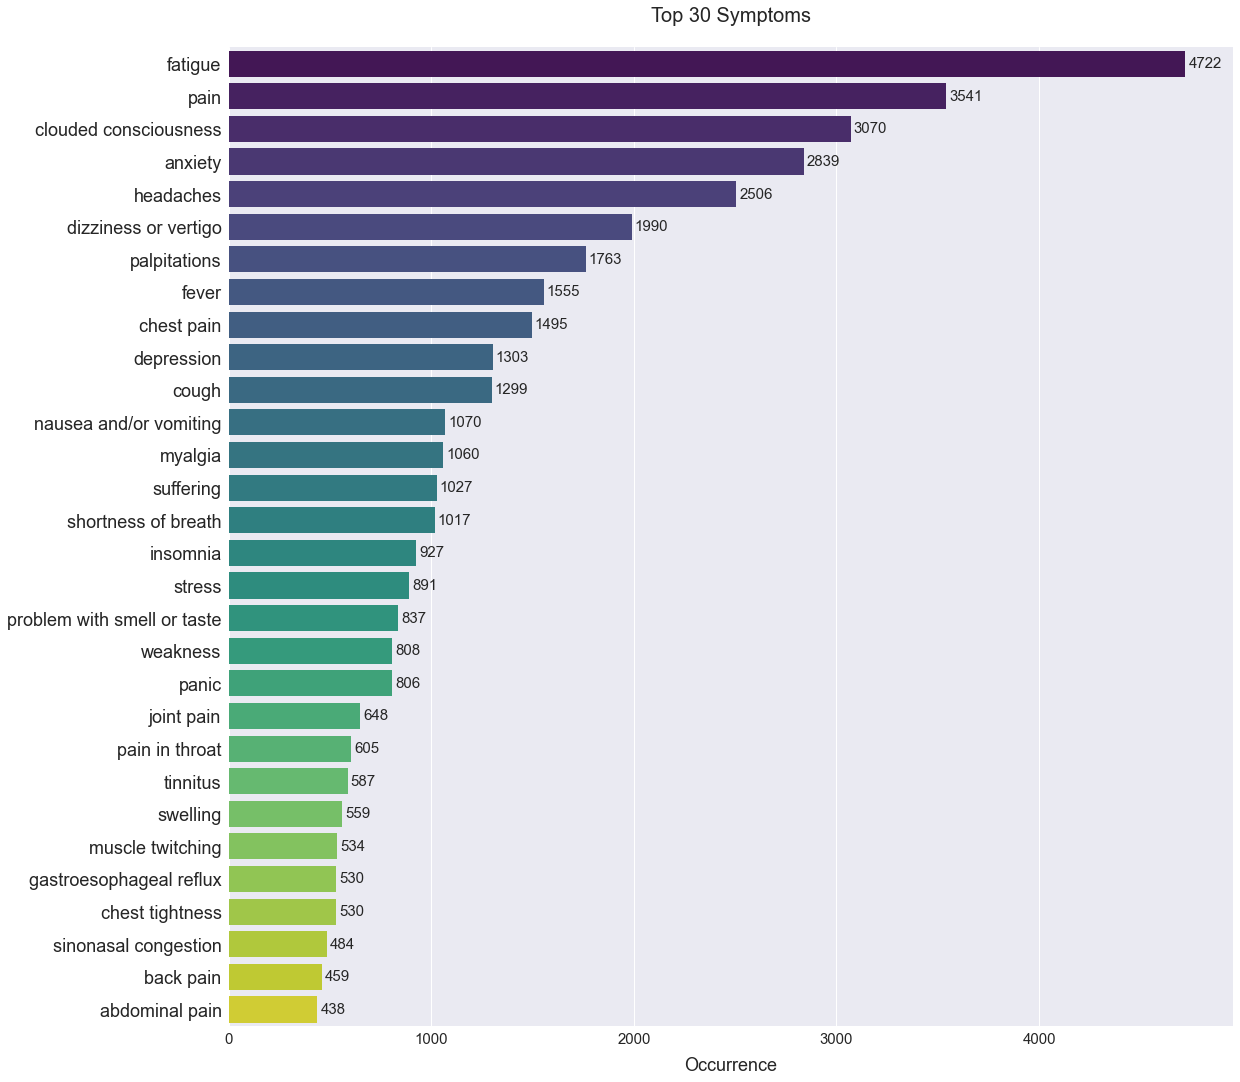

In [25]:
# Plotting the barplot for symptom occurrences

plt.figure(figsize=(18,18))
ax = sns.barplot(data=top_symptoms_df, orient='h', palette='viridis')
plt.title('Top '+ str(top_symptoms_number) +' Symptoms', y= 1.02,  fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.xlabel("Occurrence", fontsize=18, labelpad=10)
_ = ax.bar_label(ax.containers[0], fontsize=15, padding=3)

#### Most frequent symptom categories

In [26]:
# Counting the occurrences of symptom categories 

top_categories_count = collections.Counter(extracted_symptoms_categories_flat).most_common()
top_categories_df = pd.DataFrame([[t[1] for t in top_categories_count]], columns=[t[0] for t in top_categories_count], index=['occurrence'])
top_categories_df

,General,Neurological/Ocular,Mental Health/Psychological/Behavioral,Body Pain/Mobility,Cardiorespiratory,Otorhinolaryngology,Gastrointestinal,Cutaneous,Sleep,Vascular/Lymphatic,Other Symptoms,Urinary,Women's Health
occurrence,7303,6895,5653,5634,5019,2704,2411,1176,1171,609,110,93,60


In [27]:
top_categories_df.T.sum()

occurrence    38838
dtype: int64

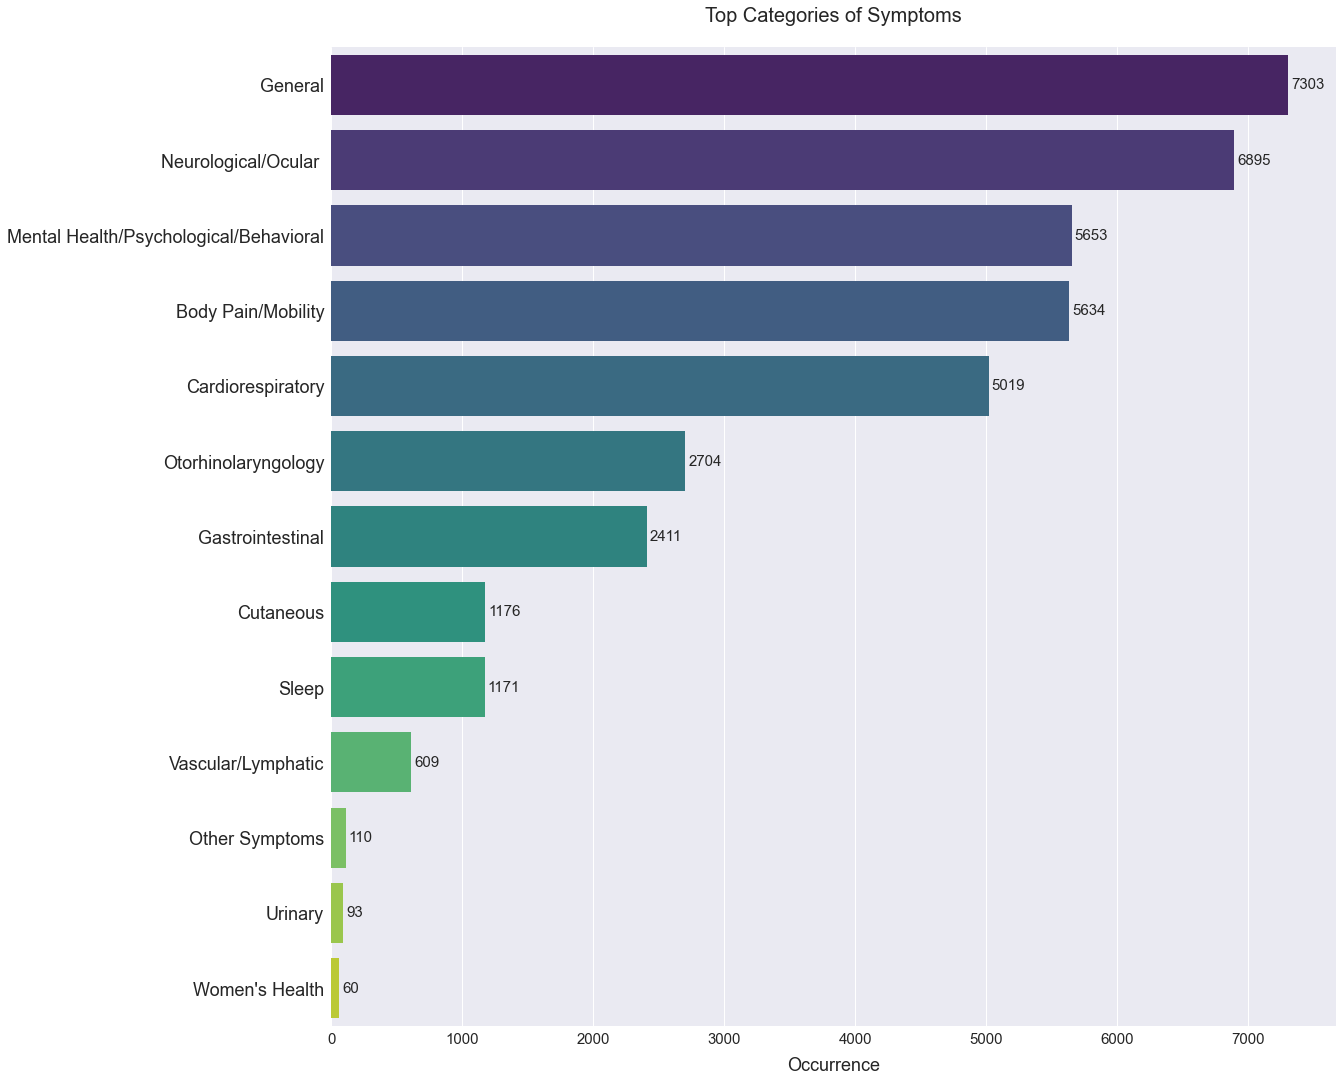

In [28]:
# Plotting the barplot for symptom categories occurrences

fig, ax = plt.subplots(figsize=(18, 18))
ax = sns.barplot(data=top_categories_df, orient='h', palette='viridis')
plt.title("Top Categories of Symptoms", y= 1.02,  fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.xlabel("Occurrence", fontsize=18, labelpad=10)
_ = ax.bar_label(ax.containers[0], fontsize=15, padding=3)

#### Symptom Categories Co-occurrences

In [29]:
from nltk import bigrams
import itertools

# identifying co-occuring categories in the extracted symptom categories from the Reddit posts
cooccurence_categories = []
for categories_list in extracted_symptoms_categories:
    cooccurence_categories.append([(i,j) for i in categories_list for j in categories_list if i!=j])
cooccurence_categories

[[],
 [],
 [],
 [],
 [('General', 'Cardiorespiratory'),
  ('General', 'Neurological/Ocular '),
  ('General', 'Body Pain/Mobility'),
  ('Cardiorespiratory', 'General'),
  ('Cardiorespiratory', 'Neurological/Ocular '),
  ('Cardiorespiratory', 'Body Pain/Mobility'),
  ('Neurological/Ocular ', 'General'),
  ('Neurological/Ocular ', 'Cardiorespiratory'),
  ('Neurological/Ocular ', 'Body Pain/Mobility'),
  ('Body Pain/Mobility', 'General'),
  ('Body Pain/Mobility', 'Cardiorespiratory'),
  ('Body Pain/Mobility', 'Neurological/Ocular ')],
 [],
 [],
 [],
 [],
 [('General', 'Neurological/Ocular '), ('Neurological/Ocular ', 'General')],
 [],
 [],
 [('Cardiorespiratory', 'Neurological/Ocular '),
  ('Neurological/Ocular ', 'Cardiorespiratory')],
 [],
 [('General', 'Mental Health/Psychological/Behavioral'),
  ('Mental Health/Psychological/Behavioral', 'General')],
 [('General', 'Neurological/Ocular '),
  ('General', 'Mental Health/Psychological/Behavioral'),
  ('Neurological/Ocular ', 'General'),
  

In [30]:
# counting the co-occurrences of symptom category pairs
bigrams = [category for category_list in cooccurence_categories for category in category_list]
bigram_counts = collections.Counter(bigrams)
bigram_counts_common = bigram_counts.most_common()
bigram_counts_common

[(('General', 'Neurological/Ocular '), 3748),
 (('Neurological/Ocular ', 'General'), 3748),
 (('General', 'Body Pain/Mobility'), 2910),
 (('Body Pain/Mobility', 'General'), 2910),
 (('Neurological/Ocular ', 'Body Pain/Mobility'), 2739),
 (('Body Pain/Mobility', 'Neurological/Ocular '), 2739),
 (('Neurological/Ocular ', 'Mental Health/Psychological/Behavioral'), 2665),
 (('Mental Health/Psychological/Behavioral', 'Neurological/Ocular '), 2665),
 (('General', 'Cardiorespiratory'), 2624),
 (('Cardiorespiratory', 'General'), 2624),
 (('General', 'Mental Health/Psychological/Behavioral'), 2575),
 (('Mental Health/Psychological/Behavioral', 'General'), 2575),
 (('Cardiorespiratory', 'Neurological/Ocular '), 2278),
 (('Neurological/Ocular ', 'Cardiorespiratory'), 2278),
 (('Cardiorespiratory', 'Mental Health/Psychological/Behavioral'), 1990),
 (('Mental Health/Psychological/Behavioral', 'Cardiorespiratory'), 1990),
 (('Body Pain/Mobility', 'Mental Health/Psychological/Behavioral'), 1987),
 ((

In [31]:
# transforming the co-occurrence count into a dictionary
bigram_counts_common_keys = [el[0] for el in bigram_counts_common]
bigram_counts_common_values = [el[1] for el in bigram_counts_common]
bigram_counts_common_dict = {k: v for k, v in zip(bigram_counts_common_keys, bigram_counts_common_values)}
bigram_counts_common_dict

{('General', 'Neurological/Ocular '): 3748,
 ('Neurological/Ocular ', 'General'): 3748,
 ('General', 'Body Pain/Mobility'): 2910,
 ('Body Pain/Mobility', 'General'): 2910,
 ('Neurological/Ocular ', 'Body Pain/Mobility'): 2739,
 ('Body Pain/Mobility', 'Neurological/Ocular '): 2739,
 ('Neurological/Ocular ', 'Mental Health/Psychological/Behavioral'): 2665,
 ('Mental Health/Psychological/Behavioral', 'Neurological/Ocular '): 2665,
 ('General', 'Cardiorespiratory'): 2624,
 ('Cardiorespiratory', 'General'): 2624,
 ('General', 'Mental Health/Psychological/Behavioral'): 2575,
 ('Mental Health/Psychological/Behavioral', 'General'): 2575,
 ('Cardiorespiratory', 'Neurological/Ocular '): 2278,
 ('Neurological/Ocular ', 'Cardiorespiratory'): 2278,
 ('Cardiorespiratory', 'Mental Health/Psychological/Behavioral'): 1990,
 ('Mental Health/Psychological/Behavioral', 'Cardiorespiratory'): 1990,
 ('Body Pain/Mobility', 'Mental Health/Psychological/Behavioral'): 1987,
 ('Mental Health/Psychological/Behavi

In [32]:
sum(bigram_counts_common_dict.values())/2

47001.0

In [33]:
#original_category_list

In [34]:
top_categories_df.columns.to_list()

['General',
 'Neurological/Ocular ',
 'Mental Health/Psychological/Behavioral',
 'Body Pain/Mobility',
 'Cardiorespiratory',
 'Otorhinolaryngology',
 'Gastrointestinal',
 'Cutaneous',
 'Sleep',
 'Vascular/Lymphatic',
 'Other Symptoms',
 'Urinary',
 "Women's Health"]

In [35]:
# crating a matrix for the co-occurence values
original_category_list = top_categories_df.columns.to_list()
newly_ordered_categories_list = ['General', 'Neurological/Ocular ', 'Body Pain/Mobility', 'Mental Health/Psychological/Behavioral', 'Cardiorespiratory', 'Otorhinolaryngology', 'Gastrointestinal', 'Cutaneous', 'Sleep', 'Vascular/Lymphatic', 'Other Symptoms', 'Urinary', "Women's Health"]
categories_heatmap_df = pd.DataFrame(columns = newly_ordered_categories_list, index = newly_ordered_categories_list, dtype=float)
max_value = max(bigram_counts_common_dict.values())
min_value = min(bigram_counts_common_dict.values())

for category in newly_ordered_categories_list:
    for cat in newly_ordered_categories_list:
        if (category, cat) in bigram_counts_common_dict.keys():
            categories_heatmap_df.loc[category, cat] = (bigram_counts_common_dict[(category, cat)] / top_categories_df[category][0]) * 100
        elif category != cat:
            categories_heatmap_df.loc[category, cat] = 0
categories_heatmap_df

,General,Neurological/Ocular,Body Pain/Mobility,Mental Health/Psychological/Behavioral,Cardiorespiratory,Otorhinolaryngology,Gastrointestinal,Cutaneous,Sleep,Vascular/Lymphatic,Other Symptoms,Urinary,Women's Health
General,NaN,51.321375,39.846638,35.259482,35.930440,20.361495,18.951116,8.571820,9.790497,3.957278,0.917431,0.657264,0.547720
Neurological/Ocular,54.358231,NaN,39.724438,38.651197,33.038434,19.535896,18.245105,7.715736,9.383611,3.727339,0.884699,0.565627,0.449601
Body Pain/Mobility,51.650692,48.615548,NaN,35.268016,35.019524,20.305289,19.950302,9.211928,8.555201,5.839546,0.922968,0.922968,0.532481
Mental Health/Psychological/Behavioral,45.551035,47.143110,35.149478,NaN,35.202547,17.035203,16.840616,7.411994,10.206970,3.007253,0.937555,0.548381,0.459933
Cardiorespiratory,52.281331,45.387527,39.310620,39.649333,NaN,22.335127,19.904363,8.168958,8.866308,4.064555,0.737199,0.697350,0.458259
Otorhinolaryngology,54.992604,49.815089,42.307692,35.613905,41.457101,NaN,21.745562,10.761834,10.207101,5.177515,1.146450,0.961538,0.369822
Gastrointestinal,57.403567,52.177520,46.619660,39.485691,41.435089,24.388221,NaN,12.567399,11.074243,4.977188,0.912484,1.078391,0.497719
Cutaneous,53.231293,45.238095,44.132653,35.629252,34.863946,24.744898,25.765306,NaN,8.758503,11.224490,1.785714,0.850340,0.850340
Sleep,61.058924,55.251921,41.161401,49.274125,38.001708,23.569599,22.801025,8.795901,NaN,4.099061,0.939368,1.280956,0.683177
Vascular/Lymphatic,47.454844,42.200328,54.022989,27.914614,33.497537,22.988506,19.704433,21.674877,7.881773,NaN,0.656814,0.985222,0.985222


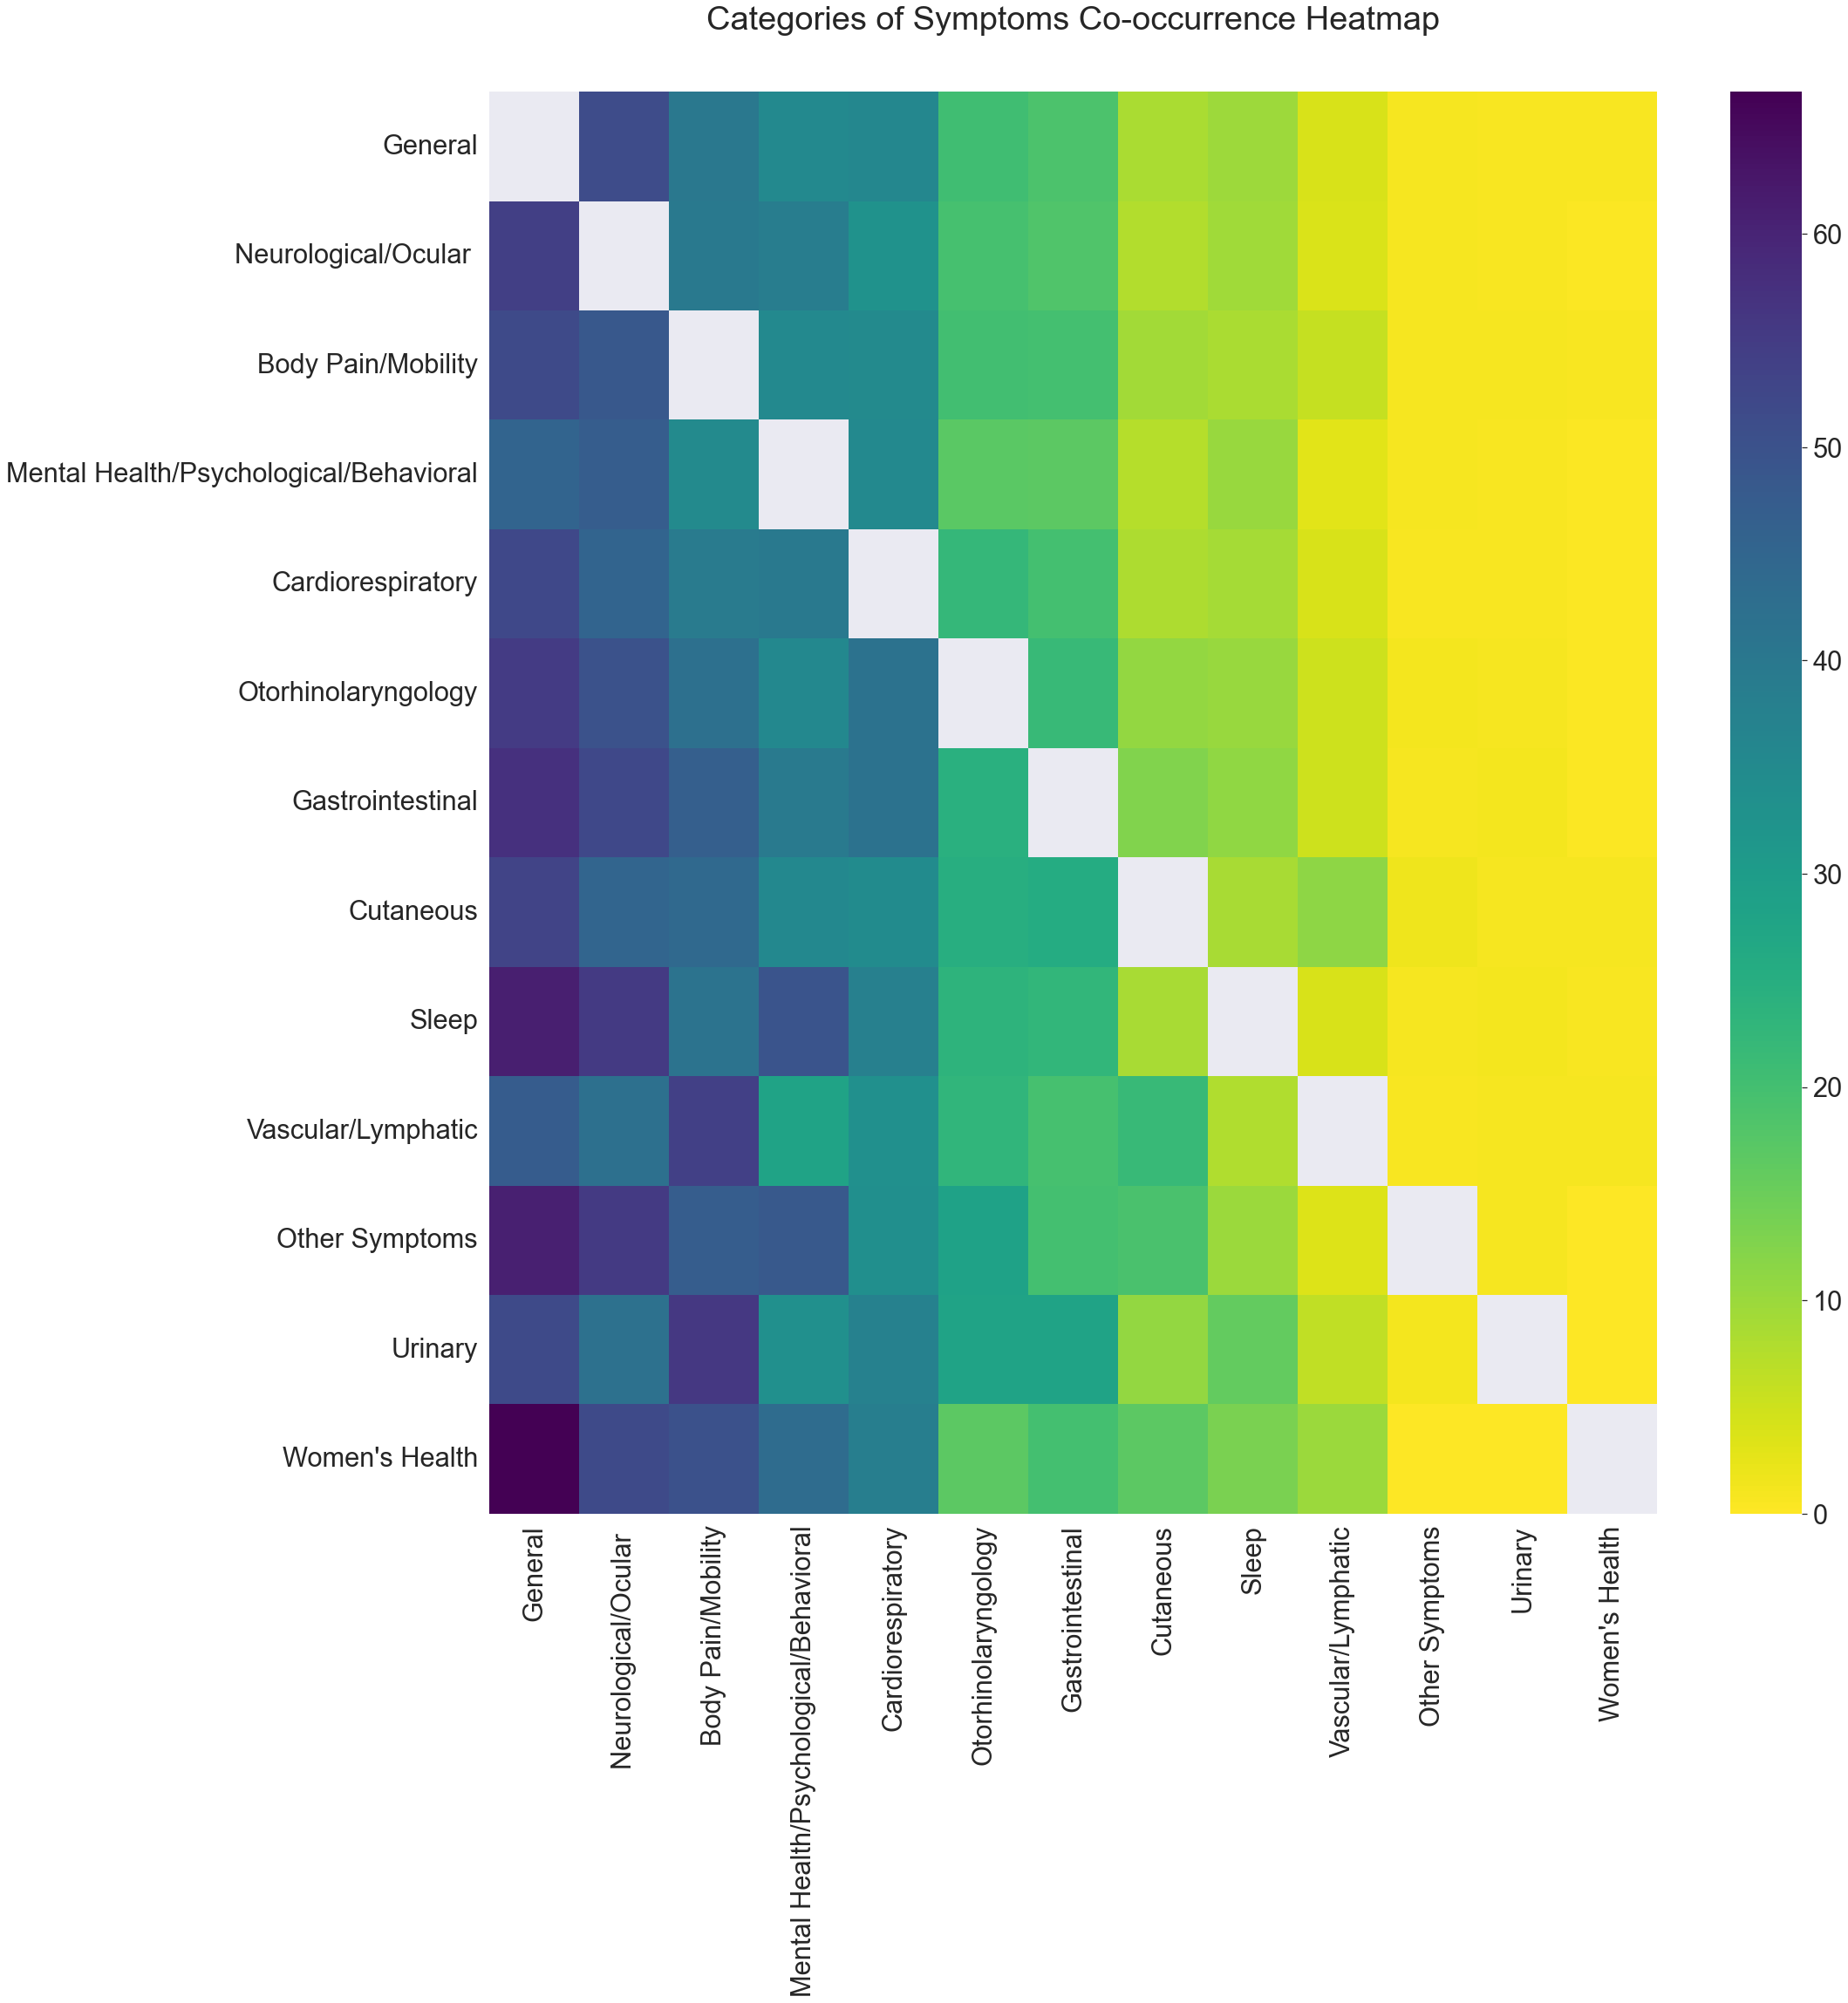

In [36]:
from matplotlib.colors import LogNorm, Normalize

# plotting the co-occurrence matrix
sns.set(font_scale=2.8)
# 3. Plot the heatmap
plt.figure(figsize=(30,30))
#heat_map = sns.heatmap(categories_heatmap_df, cmap='viridis_r', norm=LogNorm())
#mask = np.triu(np.ones_like(categories_heatmap_df.to_numpy()))
heat_map = sns.heatmap(categories_heatmap_df, cmap='viridis_r')
#heat_map = sns.heatmap(categories_heatmap_df, mask=mask, cmap='viridis_r')

plt.title("Categories of Symptoms Co-occurrence Heatmap", fontsize=38,  y=1.04)
plt.show()

In [37]:
categories_heatmap_df.loc['Sleep', 'Mental Health/Psychological/Behavioral']

49.27412467976089

#### Symptoms Co-occurrences

In [38]:
top_symptoms_count

[('fatigue', 4722),
 ('pain', 3541),
 ('clouded consciousness', 3070),
 ('anxiety', 2839),
 ('headaches', 2506),
 ('dizziness or vertigo', 1990),
 ('palpitations', 1763),
 ('fever', 1555),
 ('chest pain', 1495),
 ('depression', 1303),
 ('cough', 1299),
 ('nausea and/or vomiting', 1070),
 ('myalgia', 1060),
 ('suffering', 1027),
 ('shortness of breath', 1017),
 ('insomnia', 927),
 ('stress', 891),
 ('problem with smell or taste', 837),
 ('weakness', 808),
 ('panic', 806),
 ('joint pain', 648),
 ('pain in throat', 605),
 ('tinnitus', 587),
 ('swelling', 559),
 ('muscle twitching', 534),
 ('gastroesophageal reflux', 530),
 ('chest tightness', 530),
 ('sinonasal congestion', 484),
 ('back pain', 459),
 ('abdominal pain', 438)]

In [39]:
# identifying co-occurring symptoms in the extracted symptoms from the Reddit posts
cooccurence_symptoms_lexicon = []
for symptoms_list in extracted_symptoms_lexicon:
    cooccurence_symptoms_lexicon.append([(i,j) for i in symptoms_list for j in symptoms_list if i!=j])
cooccurence_symptoms_lexicon

[[('gastroesophageal reflux', 'intolerance to food'),
  ('gastroesophageal reflux', 'gastrointestinal symptom'),
  ('intolerance to food', 'gastroesophageal reflux'),
  ('intolerance to food', 'gastrointestinal symptom'),
  ('gastrointestinal symptom', 'gastroesophageal reflux'),
  ('gastrointestinal symptom', 'intolerance to food')],
 [],
 [],
 [],
 [('fatigue', 'chest pain'),
  ('fatigue', 'headaches'),
  ('fatigue', 'pain'),
  ('fatigue', 'palpitations'),
  ('chest pain', 'fatigue'),
  ('chest pain', 'headaches'),
  ('chest pain', 'pain'),
  ('chest pain', 'palpitations'),
  ('headaches', 'fatigue'),
  ('headaches', 'chest pain'),
  ('headaches', 'pain'),
  ('headaches', 'palpitations'),
  ('pain', 'fatigue'),
  ('pain', 'chest pain'),
  ('pain', 'headaches'),
  ('pain', 'palpitations'),
  ('palpitations', 'fatigue'),
  ('palpitations', 'chest pain'),
  ('palpitations', 'headaches'),
  ('palpitations', 'pain')],
 [],
 [],
 [('weight gain', 'weight loss'),
  ('weight gain', 'hungry')

In [40]:
# counting the co-occurrences of symptom pairs
bigrams = [symptom for symptoms_list in cooccurence_symptoms_lexicon for symptom in symptoms_list]
bigram_counts = collections.Counter(bigrams)
bigram_counts_common = bigram_counts.most_common()
bigram_counts_common

[(('fatigue', 'clouded consciousness'), 1534),
 (('clouded consciousness', 'fatigue'), 1534),
 (('fatigue', 'pain'), 1233),
 (('pain', 'fatigue'), 1233),
 (('fatigue', 'headaches'), 1115),
 (('headaches', 'fatigue'), 1115),
 (('headaches', 'pain'), 965),
 (('pain', 'headaches'), 965),
 (('fatigue', 'anxiety'), 938),
 (('anxiety', 'fatigue'), 938),
 (('dizziness or vertigo', 'fatigue'), 795),
 (('fatigue', 'dizziness or vertigo'), 795),
 (('fever', 'fatigue'), 732),
 (('fatigue', 'fever'), 732),
 (('clouded consciousness', 'anxiety'), 721),
 (('anxiety', 'clouded consciousness'), 721),
 (('clouded consciousness', 'headaches'), 695),
 (('headaches', 'clouded consciousness'), 695),
 (('pain', 'clouded consciousness'), 691),
 (('clouded consciousness', 'pain'), 691),
 (('fatigue', 'palpitations'), 660),
 (('palpitations', 'fatigue'), 660),
 (('anxiety', 'pain'), 657),
 (('pain', 'anxiety'), 657),
 (('fever', 'pain'), 633),
 (('pain', 'fever'), 633),
 (('dizziness or vertigo', 'clouded cons

In [41]:
# creating a dictionary of the bigram counts
bigram_counts_common_keys = [el[0] for el in bigram_counts_common]
bigram_counts_common_values = [el[1] for el in bigram_counts_common]
bigram_counts_common_dict = {k: v for k, v in zip(bigram_counts_common_keys, bigram_counts_common_values)}

In [49]:
# creating the co-occurrence matrix for the top 30 symptoms
top_symptoms_names = [symptom[0] for symptom in top_symptoms_count]
symptoms_heatmap_df = pd.DataFrame(columns = top_symptoms_names, index = top_symptoms_names, dtype=float)
max_value = max(bigram_counts_common_dict.values())
min_value = max(bigram_counts_common_dict.values())

for symptom in top_symptoms_names:
    for sym in top_symptoms_names:
        if (symptom, sym) in bigram_counts_common_dict.keys():
            symptoms_heatmap_df.loc[symptom, sym] = bigram_counts_common_dict[(symptom, sym)] / (top_symptoms_df[symptom][0]) * 100
        elif symptom != sym:
            categories_heatmap_df.loc[symptom, sym] = 0
symptoms_heatmap_df

,fatigue,pain,clouded consciousness,anxiety,headaches,dizziness or vertigo,palpitations,fever,chest pain,depression,...,joint pain,pain in throat,tinnitus,swelling,muscle twitching,gastroesophageal reflux,chest tightness,sinonasal congestion,back pain,abdominal pain
fatigue,NaN,26.111817,32.486235,19.864464,23.612876,16.836086,13.977128,15.501906,11.901737,11.584075,...,6.268530,6.353240,4.764930,3.473105,3.557814,3.811944,4.659043,4.595510,3.536637,3.409572
pain,34.820672,NaN,19.514262,18.554081,27.252189,13.075402,12.002259,17.876306,16.125388,9.404123,...,9.262920,6.890709,3.614798,6.636543,5.365716,4.772663,4.462016,4.094888,7.596724,4.998588
clouded consciousness,49.967427,22.508143,NaN,23.485342,22.638436,19.934853,13.061889,11.140065,9.413681,14.690554,...,5.635179,3.713355,5.374593,2.736156,3.745928,3.420195,3.648208,3.387622,3.322476,3.322476
anxiety,33.039803,23.141951,25.396266,NaN,19.091229,17.858401,19.161677,12.081719,13.420218,14.723494,...,4.367735,4.297288,5.072209,2.994012,4.860867,5.107432,5.776682,3.064459,3.557591,3.240578
headaches,44.493216,38.507582,27.733440,21.628093,NaN,23.104549,13.766959,19.393456,14.086193,10.654429,...,8.778931,8.659218,6.304868,4.988029,5.347167,4.429370,5.107741,6.743815,5.387071,5.307263
dizziness or vertigo,39.949749,23.266332,30.753769,25.477387,29.095477,NaN,20.904523,13.316583,14.522613,10.251256,...,5.226131,4.773869,8.643216,3.768844,4.472362,4.070352,5.427136,4.271357,3.768844,3.618090
palpitations,37.436188,24.106636,22.745320,30.856495,19.568917,23.596143,NaN,12.705615,23.028928,8.905275,...,5.275099,4.424277,5.955757,3.233125,5.161656,6.069200,6.693137,3.630176,4.083948,4.083948
fever,47.073955,40.707395,21.993569,22.057878,31.254019,17.041801,14.405145,NaN,13.954984,9.967846,...,6.109325,12.926045,4.694534,6.237942,3.729904,4.180064,5.787781,9.196141,5.144695,5.787781
chest pain,37.591973,38.193980,19.331104,25.484950,23.612040,19.331104,27.157191,14.515050,NaN,8.695652,...,5.284281,6.488294,3.210702,4.347826,4.013378,5.953177,5.752508,4.280936,7.157191,5.217391
depression,41.980046,25.556408,34.612433,32.079816,20.491174,15.656178,12.049117,11.895625,9.976976,NaN,...,4.221028,3.607061,5.602456,2.762855,2.762855,2.993093,3.607061,2.532617,3.300077,3.300077


In [50]:
# creating the co-occurrence matrix for the top 30 symptoms
newly_ordered_symptoms_list = ['fatigue', 'pain', 'anxiety', 'clouded consciousness', 'headaches', 'dizziness or vertigo', 'palpitations', 'fever', 'cough', 'chest pain', 'depression', 'myalgia', 'insomnia', 'shortness of breath',  'problem with smell or taste','panic', 'stress', 'suffering', 'joint pain', 'gastroesophageal reflux', 'tinnitus', 'sinonasal congestion',  'chest tightness', 'swelling', 'back pain', 'abdominal pain', 'muscle twitching',]
symptoms_heatmap_df = pd.DataFrame(columns = newly_ordered_symptoms_list, index = newly_ordered_symptoms_list, dtype=float)
max_value = max(bigram_counts_common_dict.values())
min_value = max(bigram_counts_common_dict.values())

for symptom in newly_ordered_symptoms_list:
    for sym in newly_ordered_symptoms_list:
        if (symptom, sym) in bigram_counts_common_dict.keys():
            symptoms_heatmap_df.loc[symptom, sym] = bigram_counts_common_dict[(symptom, sym)] / (top_symptoms_df[symptom][0]) * 100
        elif symptom != sym:
            categories_heatmap_df.loc[category, cat] = 0
symptoms_heatmap_df

,fatigue,pain,anxiety,clouded consciousness,headaches,dizziness or vertigo,palpitations,fever,cough,chest pain,...,suffering,joint pain,gastroesophageal reflux,tinnitus,sinonasal congestion,chest tightness,swelling,back pain,abdominal pain,muscle twitching
fatigue,NaN,26.111817,19.864464,32.486235,23.612876,16.836086,13.977128,15.501906,11.647607,11.901737,...,6.882677,6.268530,3.811944,4.764930,4.595510,4.659043,3.473105,3.536637,3.409572,3.557814
pain,34.820672,NaN,18.554081,19.514262,27.252189,13.075402,12.002259,17.876306,11.606891,16.125388,...,7.314318,9.262920,4.772663,3.614798,4.094888,4.462016,6.636543,7.596724,4.998588,5.365716
anxiety,33.039803,23.141951,NaN,25.396266,19.091229,17.858401,19.161677,12.081719,9.827404,13.420218,...,8.559352,4.367735,5.107432,5.072209,3.064459,5.776682,2.994012,3.557591,3.240578,4.860867
clouded consciousness,49.967427,22.508143,23.485342,NaN,22.638436,19.934853,13.061889,11.140065,8.273616,9.413681,...,8.045603,5.635179,3.420195,5.374593,3.387622,3.648208,2.736156,3.322476,3.322476,3.745928
headaches,44.493216,38.507582,21.628093,27.733440,NaN,23.104549,13.766959,19.393456,13.846768,14.086193,...,7.382283,8.778931,4.429370,6.304868,6.743815,5.107741,4.988029,5.387071,5.307263,5.347167
dizziness or vertigo,39.949749,23.266332,25.477387,30.753769,29.095477,NaN,20.904523,13.316583,9.396985,14.522613,...,6.180905,5.226131,4.070352,8.643216,4.271357,5.427136,3.768844,3.768844,3.618090,4.472362
palpitations,37.436188,24.106636,30.856495,22.745320,19.568917,23.596143,NaN,12.705615,9.245604,23.028928,...,6.409529,5.275099,6.069200,5.955757,3.630176,6.693137,3.233125,4.083948,4.083948,5.161656
fever,47.073955,40.707395,22.057878,21.993569,31.254019,17.041801,14.405145,NaN,24.951768,13.954984,...,7.009646,6.109325,4.180064,4.694534,9.196141,5.787781,6.237942,5.144695,5.787781,3.729904
cough,42.340262,31.639723,21.478060,19.553503,26.712856,14.395689,12.548114,29.869130,NaN,17.321016,...,6.774442,5.465743,6.774442,3.541186,14.087760,7.929176,5.465743,5.234796,4.695920,3.002309
chest pain,37.591973,38.193980,25.484950,19.331104,23.612040,19.331104,27.157191,14.515050,15.050167,NaN,...,6.488294,5.284281,5.953177,3.210702,4.280936,5.752508,4.347826,7.157191,5.217391,4.013378


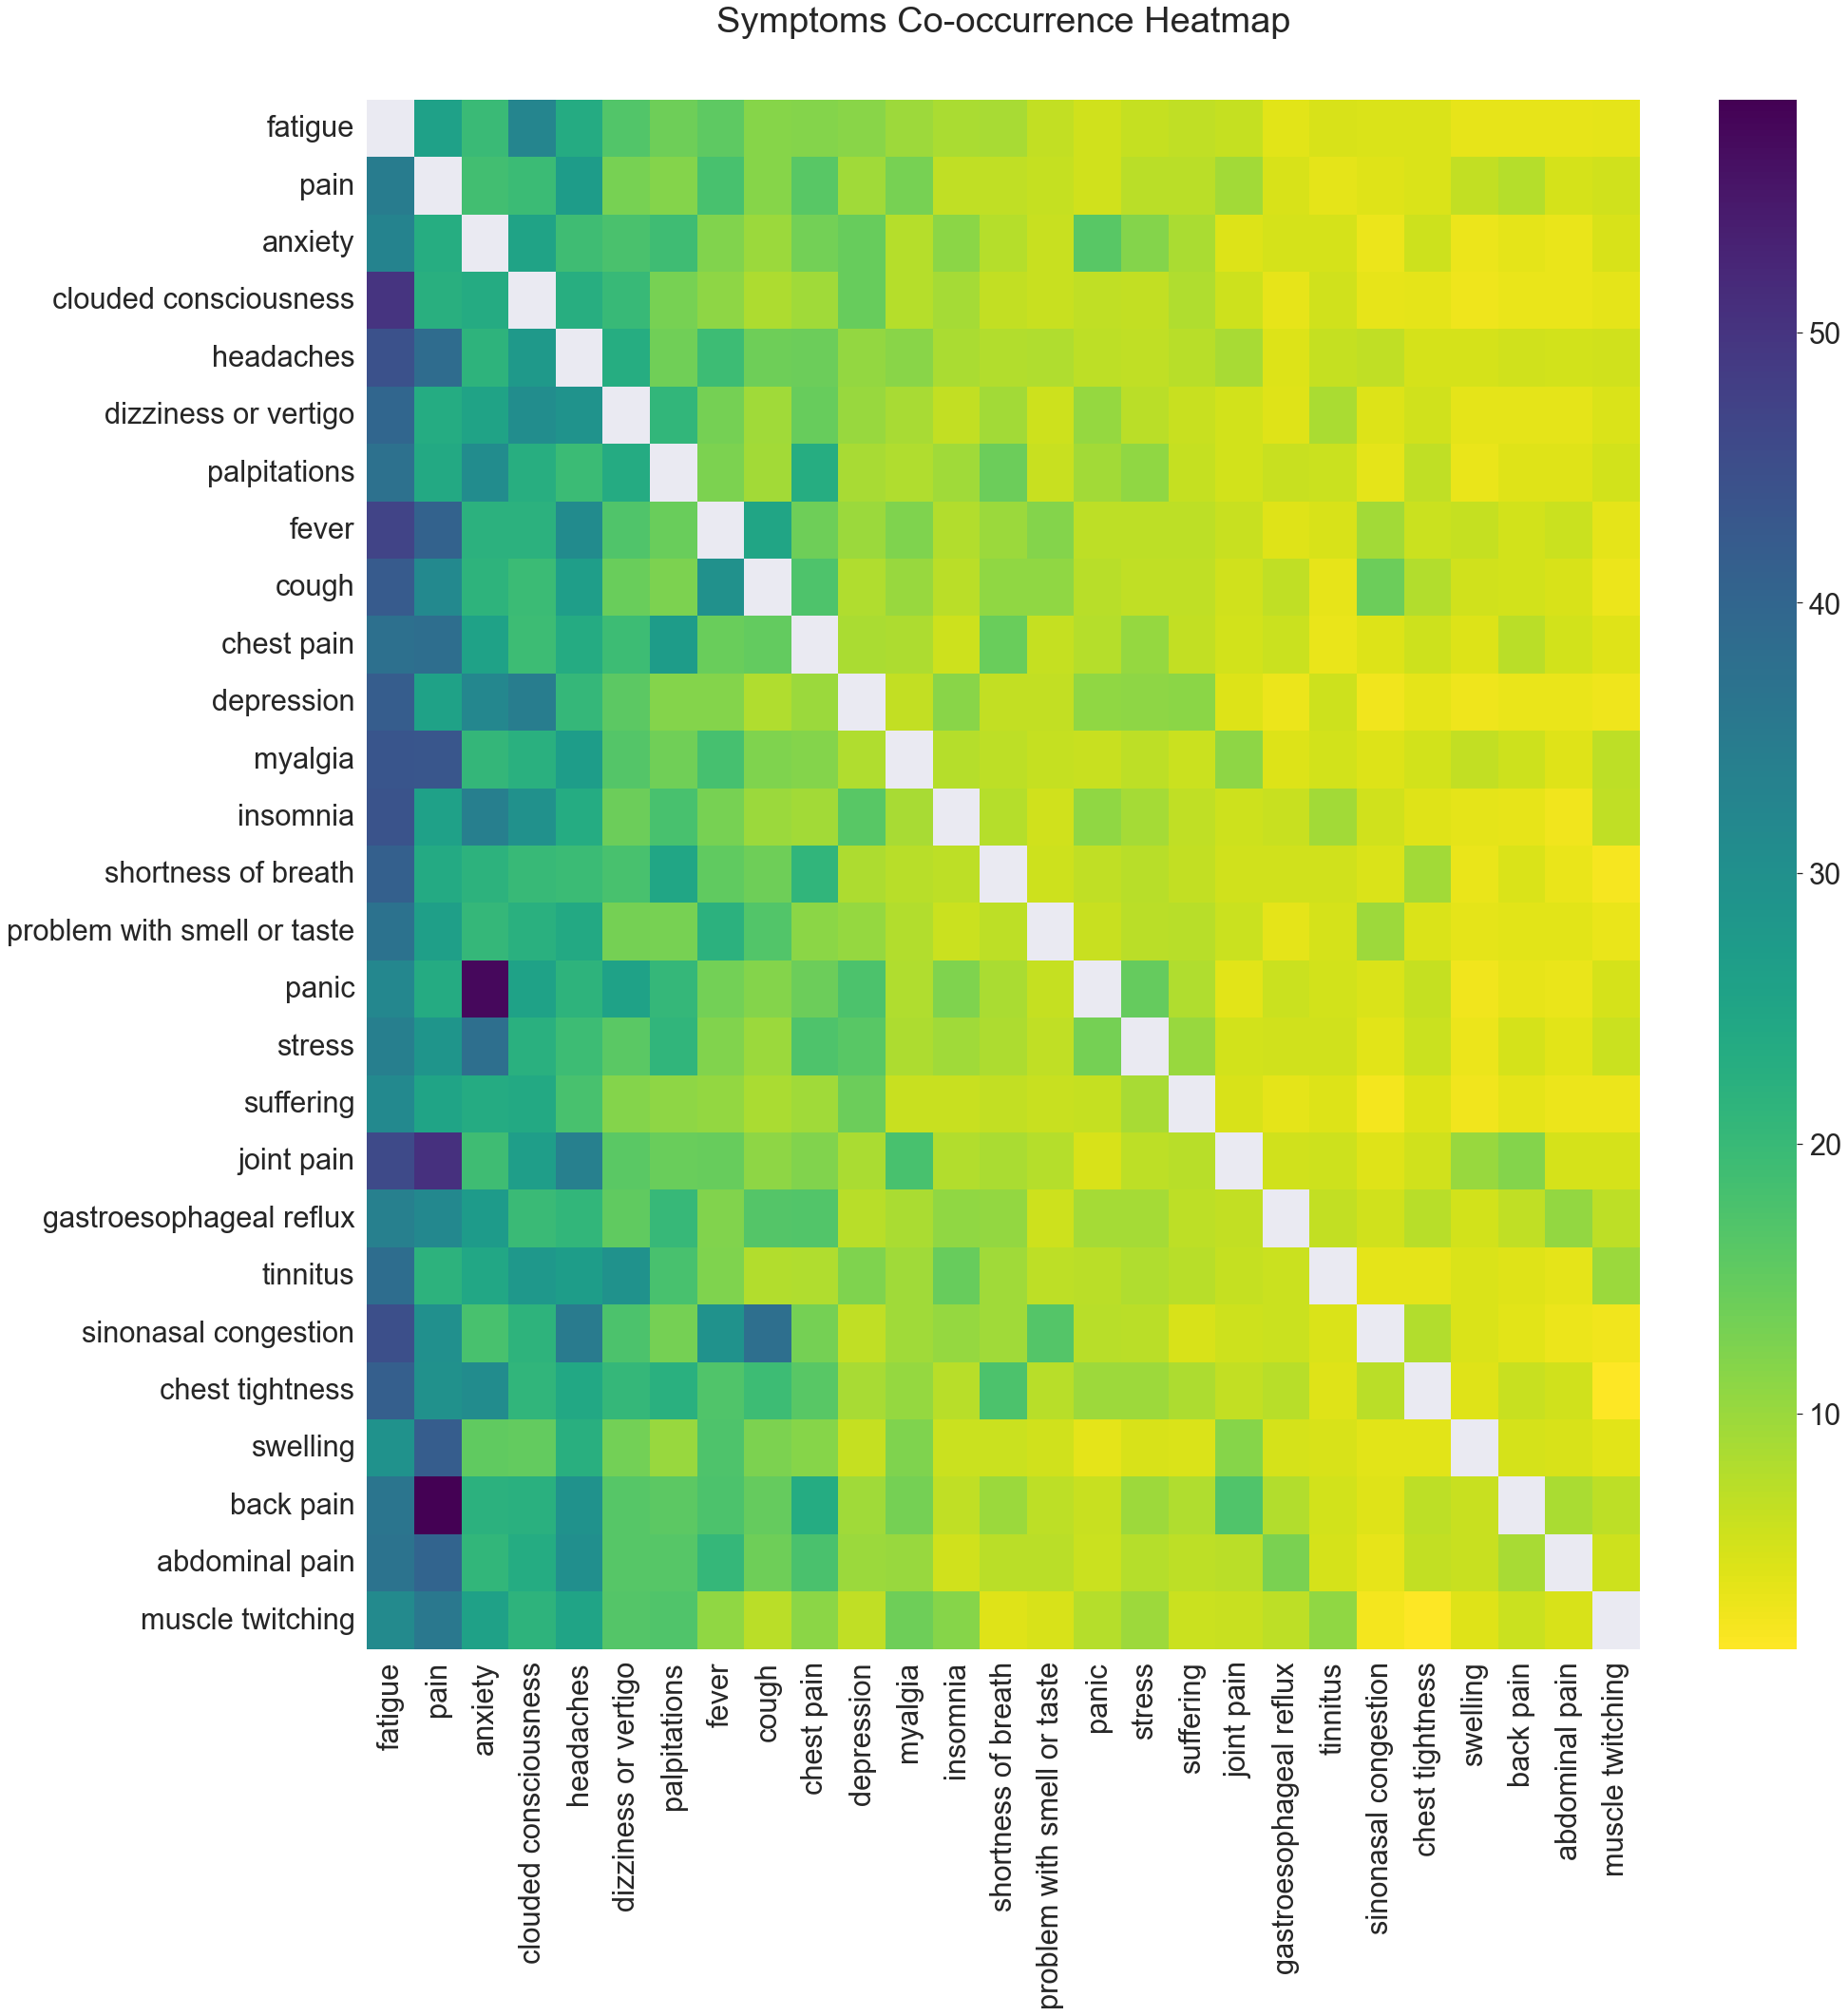

In [51]:
# plotting the heatmap from the matrix
sns.set(font_scale=2.8)
# 3. Plot the heatmap
plt.figure(figsize=(30,30))
#heat_map = sns.heatmap(symptoms_heatmap_df, cmap='rainbow', norm=LogNorm())
heat_map = sns.heatmap(symptoms_heatmap_df, cmap='viridis_r')
plt.title("Symptoms Co-occurrence Heatmap", fontsize=38,  y=1.04)
plt.show()

In [52]:
symptoms_heatmap_df.loc['joint pain', 'fatigue']

45.67901234567901

In [59]:
symptoms_heatmap_df.loc['depression', 'headaches']

20.491174213353798

In [54]:
symptoms_heatmap_df.loc['fever', 'pain']

40.70739549839229

In [53]:
symptoms_heatmap_df.loc['chest tightness', 'anxiety']

30.943396226415093